<h1><center>Bayes Decision Boundary & Bias-Variance Trade-off</center></h1>

---



<h2><center>Machine Learning</center></h2>
<h6><center>Bruno Vaz 201705247, Filipe Justiça 201606339, Tiago Coelho 201604170, Vasco Soares 201604364</center><h6>
<p ><center>Faculdade de Ciências da Universidade do Porto<center><p>

# Introduction  
### Context and Motivation

<div style='text-align: justify;'>  
&nbsp;&nbsp;&nbsp; Machine learning models use data to find an approximation of the true function that maps the descriptive variables into the target variable. In order to achieve this, different algorithms use different methods to minimize the expected prediction error. In classification this is the same as saying that the models attempt to maximize the probability of the prediction being equal to the actual class while knowing the descriptive variables values, $P(Y=k | X=x)$. The optimal boundary that maximizes $P(Y=k | X=x)$ is called the Bayes Decision Boundary, and is usually not possible to determine it unless the densities of the variables are known. Though, it's possible to visualize the produced boundary of each model and try to measure how far it is from the actual optimal boundary using empirical evaluation approaches. 
<br>
&nbsp;&nbsp;&nbsp; Another important aspect of a Machine Learning model is its expressiveness. More expressive models tend to fit better to the training data, though they are a lot more likely to incur in overfitting. So, on the one hand, an expressive model can better capture the patterns of the sample in which it was trained, but, on the other hand, less expressive models are less influenced by the sample and do not incur in overfitting. An expressive model has more variance error (a big part of the error is caused by the sample used to train the model) and is less biased (a smaller part of the error comes from the initial assumptions).
<br>
&nbsp;&nbsp;&nbsp; In this work we analyse different models in terms of their ability to approximate the Bayes Decision Boundary and where they stand in the bias-variance trade-off using different datasets and hyperparameters. 

</div>

### Problem Definition and Methodology
<div style='text-align: justify;'>  
&nbsp;&nbsp;&nbsp;Evaluating how good is the approximation of a certain model to the Bayes Decision Boundary without knowing the probability density function of the data is only possible by observing the actual boundary produced. With that said, we used three different methods that directly attempt to approximate the Bayes Decision Boundary, to predict the Outcome in the Pima Indians Diabetes dataset (https://www.kaggle.com/uciml/pima-indians-diabetes-database), using only two predictors so that the produced boundaries can be observed. The methods used were:
<ul>
<li>K-nearest neighbours (where we tried different values of k to further understand the influence of the hyperparameter in the produced boundary)</li>
<li>Logistic Regression</li>
<li>Quadratic Discriminant Analysis</li>
</ul>
&nbsp;&nbsp;&nbsp;Each of these models has different assumptions and will lead to different degrees of expressiveness, which results in different biases and variances for each one. This was also studied in this work, by comparing the results of the different methods.
<br>
&nbsp;&nbsp;&nbsp;The bias-variance trade-off was also studied in more detail with the Yeast UCI dataset (https://archive.ics.uci.edu/ml/datasets/Yeast), in which we selected the best model to predict the localization sites of proteins, among the K-nearest neighbours, logistic regression and decision trees. In order to make the best selection possible, we divided the dataset set in train and test, then, in the train we performed hyparameter tuning and cross validation to validate the models with the best parameters.  In the end we compare the different methods in the test set. Since localization site of proteins is heavily unbalanced, the methods that were used to train the models take that into consideration.    

</div>



In [ ]:
#@title 
from IPython.display import HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [ ]:
#@title 
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [ ]:
#@title 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Question 1: Decision Boundaries**

In [ ]:
#@title 
db = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
#db = pd.read_csv("diabetes.csv")
db.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]



```
# This is formatted as code
```

<div style='text-align: justify;'>  
&nbsp;&nbsp;&nbsp;We started by plotting the scatter plots between every pair of variables in the dataset and we attribute the red color to the <b>Diabetic</b> class and the blue color to the <b>Non-Diabetic</b> class. Below are the produced plots.
</div>

In [ ]:
#@title 
textd = ['non-diabetic' if cl==0 else 'diabetic' for cl in db['Outcome']]
fig = go.Figure(data=go.Splom(
                  dimensions=[dict(label='Pregnancies', values=db['Pregnancies']),
                              dict(label='Glucose', values=db['Glucose']),
                              dict(label='BloodPressure', values=db['BloodPressure']),
                              dict(label='SkinThickness', values=db['SkinThickness']),
                              dict(label='Insulin', values=db['Insulin']),
                              dict(label='BMI', values=db['BMI']),
                              dict(label='DiabPedigreeFun', values=db['DiabetesPedigreeFunction']),
                              dict(label='Age', values=db['Age'])],
                  marker=dict(color=db['Outcome'],
                              size=5,
                              colorscale='Bluered',
                              line=dict(width=0.5,
                                        color='rgb(230,230,230)')),
                  text=textd,
                  showupperhalf=False,
                  diagonal=dict(visible=False)))

title = "Scatterplot Matrix (SPLOM) for Diabetes Dataset<br>Data source:"+\
        " <a href='https://www.kaggle.com/uciml/pima-indians-diabetes-database/data'>[1]</a>"
fig.update_layout(title=title,
                  dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')

fig.show()

<div style='text-align: justify;'>  
&nbsp;&nbsp;&nbsp;From the scatter plots above, we could see that not a single one was able to well separate the diabetics from the non-diabetics (meaning that it is not a good approach to classify a person as diabetic or non-diabetic just with two predictors). Nonetheless, there are some pairs of variables which can separate reasonably well the two classes.
<br>
&nbsp;&nbsp;&nbsp;The chosen pair of variables was <i>Glucose</i> and <i>BMI</i>. We noticed, however, from the scatter plot regarding these two attributes, that we have some implausible values: there cannot be people with a null BMI, nor with zero Glucose. Hence, these far-fetched values were removed (see the plot below).
</div>

In [ ]:
#@title
db = db.loc[(db["Glucose"] !=0) & (db["BMI"] !=0)]
fig = make_subplots()

fig.add_trace(
          go.Scatter(
              x=db.loc[db.Outcome!=1]['Glucose'],
              y=db.loc[db.Outcome!=1]['BMI'],
              mode="markers",
              name="Non Diabetic",
              marker_color="#6993FF",
              showlegend=True
          )
      )

fig.add_trace(
          go.Scatter(
              x=db.loc[db.Outcome==1]['Glucose'],
              y=db.loc[db.Outcome==1]['BMI'],
              mode="markers",
              name="Diabetic",
              marker_color="#F64E60",
              showlegend=True
          )
      )

fig.update_yaxes(
          showgrid= True, 
          gridcolor="#F3F6F9",
          title='BMI'
      )
fig.update_xaxes(
          showgrid= True, 
          gridcolor="#F3F6F9",
          title='Glucose'
      )

fig.update_layout(
  paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',
  height = 300,
  width=400,
  font_color="black",        
  titlefont_size=16,
  hovermode='closest',
  bargap=0.2,
  margin=dict(b=20,l=5,r=5,t=40),
  legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1,
    font_size=20,
    xanchor="center",
    x=0.5
  ),
)
fig.show()

<div style='text-align: justify;'>  
&nbsp;&nbsp;&nbsp;Next, we used three methods (K-Nearest Neighbours, Logistic Regression and Quadratic Discriminant Analysis) to produce a decision boundary.
</div>

## K-Nearest Neighbours

<div style='text-align: justify;'>  
&nbsp;&nbsp;&nbsp;The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. 
<br>
&nbsp;&nbsp;&nbsp;The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN estimates $P(Y=y|X=x)$ by reasoning locally. 
</div>
 
**Choosing the right value for K**
<div style='text-align: justify;'>  
&nbsp;&nbsp;&nbsp;To select the best K for our data, we ran the KNN algorithm several times using cross-validation with $5$ folds and with different values of K. Then, we chose the K that reduced the number of errors we encountered while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before. 
<br>
&nbsp;&nbsp;&nbsp;The value of k in the KNN algorithm is related to the error rate of the model. A small value of k could lead to overfitting and a big value of k can lead to underfitting. Overfitting implies that the model performs well on the training data but has poor performance when it needs to classify unseen data.

</div>

In [ ]:
#@title 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

X = db[["Glucose","BMI"]].to_numpy()
y = db["Outcome"].to_numpy()

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

def knn_classifier_score(k,X,y):
    model=KNeighborsClassifier(n_neighbors=k, weights='uniform')
    scores = cross_validate(model, X, y, scoring='accuracy', cv=cv, return_train_score=True, n_jobs=-1)
    acc_train = np.mean(scores['train_score'])
    acc_test = np.mean(scores['test_score'])
    return np.array([1-acc_test,1-acc_train])

k_values=np.arange(1,600,2)

errors = map(lambda k: knn_classifier_score(k,X,y),k_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

fig = go.Figure()
fig.add_trace(go.Scatter(x=k_values,y=test_error,mode='lines',name='test'))
fig.add_trace(go.Scatter(x=k_values,y=train_error,mode='lines',name='train'))
fig.update_layout(
    title="KNN Performance with k",
    xaxis_title="k",
    yaxis_title="classification error",
    paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',
    height = 300,
    width=700,
    font_color="black",        
    titlefont_size=16,
    hovermode='closest',
    bargap=0.2,
    margin=dict(b=20,l=5,r=5,t=40),
    legend=dict(
      orientation="h",
      yanchor="bottom",
      y=1,
      font_size=20,
      xanchor="center",
      x=0.5
    ),
)
fig.show()

<div style='text-align: justify;'>  
&nbsp;&nbsp;&nbsp;The plot above demonstrates the evolution of the mean train and test errors as k increases. When k is small the mean train error is very low, while the mean test error is high. These results are expected since the error of the k-NN with a small number of k neighbours is heavily explained by the training sample, so the model is overfitting. 
<br>
&nbsp;&nbsp;&nbsp;With the increase in the number of neighbours we observe the increase in the mean train error and the decrease in mean test error, approximating the two scores. When looking for the ideal k value, we must determine the point in which the mean test error reaches a minimum value (around $39$), i.e, the model is more apt to correctly classify new unseen cases.
<br>  
&nbsp;&nbsp;&nbsp;After the $k=387$ threshold, we can see that in subsequent models the mean train and test errors have converged to reflect the dataset distribution. The error metrics assume the value of $0.3489$, which corresponds to the $\%$ share of observations in the minority class $Y = Diabetic$. The number of neighbours becomes high enough so that the model always predicts the majority class, which reflects extreme underfitting.

</div>

In [ ]:
#@title 
### Use this function to plot contour predicted by any model ###
## Provide the model, the dataframe of training or test or both combined in the same, a title, and the names of the axis like in the dataframe ## 
def plot_classifier_boundary(model,db,X,title,xaxis,yaxis,h = .5,fig=[],row=0,col=0,legend=True):
  # this function can be used with any sklearn classifier
  # ready for two classes but can be easily extended
  x_min, x_max = X[:, 0].min()-5, X[:, 0].max()+5
  y_min, y_max = X[:, 1].min()-5, X[:, 1].max()+5
  # generate a grid with step h
  xrange = np.arange(x_min, x_max, h)
  yrange = np.arange(y_min, y_max, h)
  xx, yy = np.meshgrid(xrange,yrange)
  # the method ravel flattens xx and yy


  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  if not fig:
    fig = go.Figure(
      data=[
        go.Scatter(
          x=db.loc[db.Outcome!=1][xaxis],
          y=db.loc[db.Outcome!=1][yaxis],
          mode="markers",
          name="Non Diabetic",
          marker_color="#6993FF",
          showlegend=True
        ),
        go.Scatter(
          x=db.loc[db.Outcome==1][xaxis],
          y=db.loc[db.Outcome==1][yaxis],
          mode="markers",
          name="Diabetic",
          marker_color="#F64E60",
          showlegend=True
        ),
        go.Contour(
          x=xrange,
          y=yrange,
          z=Z,
          colorscale=[[0, "#E1E9FF"], [1, "#FFE2E5"]],
          showscale=False,
          name="Predictions"
        ),
    ])
    fig.update_layout(
      title=title,
      height = 350,
      width = 600,
      paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',
      font_color="black",        
      titlefont_size=16,
      #showlegend=False,
      bargap=0.2,
      margin=dict(b=20,l=5,r=5,t=40),
      legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1,
        xanchor="center",
        x=0.5
      ),
      xaxis={"title":xaxis,"range":[np.min(db["Glucose"]),np.max(db["Glucose"])]},
      yaxis={"title":yaxis}
    )
    fig.show()
    return fig
  else:
    fig.add_trace(
        go.Scatter(
          x=db.loc[db.Outcome!=1][xaxis],
          y=db.loc[db.Outcome!=1][yaxis],
          mode="markers",
          name="Non Diabetic",
          marker_color="#6993FF",
          showlegend=legend
        ),row=row,col=col
    )
    fig.add_trace(
        go.Scatter(
          x=db.loc[db.Outcome==1][xaxis],
          y=db.loc[db.Outcome==1][yaxis],
          mode="markers",
          name="Diabetic",
          marker_color="#F64E60",
          showlegend=legend
        ),row=row,col=col
    )
    fig.add_trace(
        go.Contour(
          x=xrange,
          y=yrange,
          z=Z,
          colorscale=[[0, "#E1E9FF"], [1, "#FFE2E5"]],
          showscale=False,
          name="Predictions"
        ),row=row,col=col
    )
    fig.update_xaxes(title=xaxis,range=[np.min(db["Glucose"]),np.max(db["Glucose"])],row=row,col=col)
    fig.update_yaxes(title=yaxis,row=row,col=col)
    return fig


best_k = np.min(test_error)
for i in range(len(k_values)):
    if best_k==test_error[i]:
        best_k=k_values[i]
        break

fig=make_subplots(rows=2,cols=2,subplot_titles=["Overfitt","Underfitt","kNN, k="+str(best_k)],specs=[[{}, {}],[{"colspan": 2}, None]],vertical_spacing=0.1)

model = KNeighborsClassifier(n_neighbors=1, weights='uniform').fit(X,y)
fig = plot_classifier_boundary(model,db,X,"kNN, k=1","Glucose","BMI",fig=fig,row=1,col=1,legend=True)

model = KNeighborsClassifier(n_neighbors=399, weights='uniform').fit(X,y)
fig = plot_classifier_boundary(model,db,X,"kNN, k=399","Glucose","BMI",fig=fig,row=1,col=2,legend=False)

model = KNeighborsClassifier(n_neighbors=best_k, weights='uniform').fit(X,y)
fig = plot_classifier_boundary(model,db,X,"kNN, k="+str(best_k),"Glucose","BMI",fig=fig,row=2,col=1,legend=False)

fig.update_layout(
  height = 600,
  width = 900,
  paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',
  font_color="black",        
  titlefont_size=16,
  showlegend=True,
  bargap=0.2,
  margin=dict(b=20,l=5,r=5,t=0),
  legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="center",
    x=0.5
  )
)




In [ ]:
#@title
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

X = db[["Glucose","BMI"]].to_numpy()
y = db["Outcome"].to_numpy()
knn = KNeighborsClassifier(n_neighbors = best_k).fit(X, y)

print('Accuracy Score : ' + str(accuracy_score(y,knn.predict(X))))
print('Precision Score : ' + str(precision_score(y,knn.predict(X))))
print('Recall Score : ' + str(recall_score(y,knn.predict(X))))
print('F1 Score : ' + str(f1_score(y,knn.predict(X))))
print('Confusion Matrix : \n' + str(confusion_matrix(y,knn.predict(X))))

Accuracy Score : 0.7699468085106383
Precision Score : 0.7263681592039801
Recall Score : 0.553030303030303
F1 Score : 0.6279569892473118
Confusion Matrix : 
[[433  55]
 [118 146]]


<div style='text-align: justify;'>  
&nbsp;&nbsp;&nbsp;When observing the resulting boundaries we can spot many obvious differences between them:
<br>
&nbsp;&nbsp;&nbsp;In $k=1$ we can see a really expressive boundary but with a high degree of variance (and low bias), easily identifiable by the single observation "red neighbourhood islands" within a mostly blue space of the distribution. This model is overfitting the data, as we can see that is not generalizing well on data it has never seen before.
<br>
&nbsp;&nbsp;&nbsp;In $k = 387$ the opposite occurs. The model lacks expressiveness and possesses a high degree of bias (and low variance). We can see that the model is significantly oversimplified and is not quite able to capture the patterns of the underlying data, resulting in an almost linear separation and leading to underfit.
<br>
&nbsp;&nbsp;&nbsp;Lastly, in $k = 39$ we are left with a good Bias-Variance trade-off. The boundary remains expressive enough to capture complex patterns of the data but generalized enough that it can perform well at separating unseen observations.
</div> 

## Logistic Regression
<div style='text-align: justify;'>  
&nbsp;&nbsp;&nbsp;Input values (x) are combined linearly using coefficient values to predict an output value (y). A key difference from linear regression is that the output value being modelled is a binary value (0 or 1) rather than a numeric value, making it more fitting for classification problems. Moreover, unlike LDA, the logistic regression does not assume any Gaussian distribution with a common covariance matrix in each class and typically outperforms LDA when the assumptions are not met.
<br>
&nbsp;&nbsp;&nbsp;Logistic regression models the probability of the default class. Predictions are obtained by transforming probability into binary values (0 or 1) given a a threshold value. It also assumes that the data follows the binomial distribution.
<br>
$$ P(X) = P(Y=Diabetic|X)= \frac{e^{(\beta_0 + \beta_1BMI + \beta_2Glucose)} }{(1 + e^{(\beta_0 + \beta_1BMI + \beta_2Glucose)})} $$
</div>

In [ ]:
#@title 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
#db = pd.read_csv('diabetes.csv')
X = db[["Glucose","BMI"]].to_numpy()
y = db["Outcome"].to_numpy()
lr = LogisticRegression().fit(X, y)
plot_classifier_boundary(lr, db, X, 'Logistic Regression', 'Glucose', 'BMI', h = .1)

print('Accuracy Score : ' + str(accuracy_score(y,lr.predict(X))))
print('Precision Score : ' + str(precision_score(y,lr.predict(X))))
print('Recall Score : ' + str(recall_score(y,lr.predict(X))))
print('F1 Score : ' + str(f1_score(y,lr.predict(X))))
print('Confusion Matrix : \n' + str(confusion_matrix(y,lr.predict(X))))

Accuracy Score : 0.7646276595744681
Precision Score : 0.7185929648241206
Recall Score : 0.5416666666666666
F1 Score : 0.6177105831533477
Confusion Matrix : 
[[432  56]
 [121 143]]


<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;The equation of the line in the above plot is given by $BMI = -0.46Glucose + 98.47$
<br>
&nbsp;&nbsp;&nbsp;As we can see from the graphic above, the Logistic Regression model is not able to correctly separate the Non-Diabetic from the Diabetic cases. This is due to the fact that our data is not linearly separable - look at the observations in the center of the plot above, where we have a mixture of the two classes - and the Logistic Regression model assumes a linear boundary (high bias). Hence, despite the model's low variance, the linear assumption does not allow it to better divide the data.
</div>

## Quadratic Discriminant Analysis 

<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;The goal of discriminant analysis is to find a function f(x) that maximizes $P(Y=y|X=x)$. To do this it assumes that the class conditional distribution of the data $P(X|y=k)$ is modelled by using Bayes theorem, so, for a given point x:
<br>
<br>
$$ P(Y=k | X=x) = \frac{P(X=x | Y=k) P(Y=k)}{P(X=x)} $$
</div>
<br>
<br>
<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;$P(Y=k)$ can be estimated from the proportion of classes and $P(X=x|Y=k)$ is assumed to be a multivariate Gaussian distribution:
<br>
&nbsp;&nbsp;&nbsp;With this, the model estimates $u_{k}$ and the covariance for each class.
<br>
&nbsp;&nbsp;&nbsp;In Quadratic Discriminant Analysis the assumption of LDA that all the densities $P(X=x|Y=k)$ have the same covariance is relaxed, which result in quadratic boundaries.
</div>

In [ ]:
#@title 
two_d_out1 =np.histogram2d(db.loc[db["Outcome"]==1]["Glucose"].to_numpy(),db.loc[db["Outcome"]==1]["BMI"].to_numpy())
two_d_out0 =np.histogram2d(db.loc[db["Outcome"]==0]["Glucose"].to_numpy(),db.loc[db["Outcome"]==0]["BMI"].to_numpy())
fig = make_subplots(
    rows=1,cols=2,
    subplot_titles=["P(X=x|Y=0)","P(X=x|Y=1)"],
    specs=[[{'type': 'surface'}, {'type': 'surface'}]]
)
fig.add_trace(
  go.Surface(x=two_d_out0[1],y=two_d_out0[2],z=two_d_out0[0]),
  row=1,col=1
)
fig.add_trace(
  go.Surface(x=two_d_out1[1],y=two_d_out1[2], z=two_d_out1[0]),
  row=1,col=2
)
fig.update_traces(
  contours_z=dict(
      show=True, 
      #usecolormap=True,
      highlightcolor="limegreen", 
      project_z=True
  )
)
fig.update_layout( 
    title="Multivariate distribution of Glucose and BMI for each outcome",
    scene = dict(
        xaxis_title='Glucose',
        yaxis_title='BMI',
        zaxis_title='Nº of observations'
    ),
    scene2 = dict(
        xaxis_title='Glucose',
        yaxis_title='BMI',
        zaxis_title='Nº of observations'
    ),
    autosize=False,
    scene2_camera_eye=dict(x=1.7, y=-1.5, z=0.5),
    scene_camera_eye=dict(x=3.0, y=-1, z=0.5),
    width=900, height=450,
    margin=dict(l=0, r=0, b=50, t=100)
)
fig.update_xaxes(title="Glucose",row=1,col=1)
fig.show()

<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;As seen in the plot above both $P(X=x|Y=k)$ distributions don't seem to follow a normal distribution. This means that the assumptions of the QDA are not met. Even though, we still generated the boundary to compare with the ones produced by the other models.
</div>

In [ ]:
#@title 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
X = db[["Glucose","BMI"]].to_numpy()
y = db["Outcome"].to_numpy()

discr=QDA().fit(X,y)
plot_classifier_boundary(discr, db, X, 'QDA', 'Glucose', 'BMI', h = .1)
print('Accuracy Score : ' + str(accuracy_score(y,discr.predict(X))))
print('Precision Score : ' + str(precision_score(y,discr.predict(X))))
print('Recall Score : ' + str(recall_score(y,discr.predict(X))))
print('F1 Score : ' + str(f1_score(y,discr.predict(X))))
print('Confusion Matrix : \n' + str(confusion_matrix(y,discr.predict(X))))

Accuracy Score : 0.7646276595744681
Precision Score : 0.7230769230769231
Recall Score : 0.5340909090909091
F1 Score : 0.6143790849673202
Confusion Matrix : 
[[434  54]
 [123 141]]


<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;The boundary generated by the Quadratic Discriminant Analysis is, as expected, not a linear boundary, but a quadratic one. The boundary seems to make a reasonable division of the two classes, but is not able to capture the diabetic individuals that have similar Glucose and BMI to the non-diabetic, which results in a bad recall score. The model is better in classifying individuals as non-diabetic, though, in medicine it is more important to be sure that most individuals classified as negative really are negative.
</div>

## Model Comparison

<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;As was visible from the plots and analysis above, none of the three methods seems to correctly approximate the decision boundary. Moreover, despite all the evident differences between the models' generated boundaries (a linear boundary given by the Logistic Regression, a quadratic one given by QDA, and a more flexible boundary provided by K-NN), we noted that the accuracy of every model was extremely similar (around $76\%$).
<br>
&nbsp;&nbsp;&nbsp;As explained before, the Logistic Regression model, being based on a linear assumption (high bias and low variance), could not perform well in the given data since it (the data) was not linearly separable. On the other extreme we have the K-NN method which is extremely expressive, in the sense that its boundary can be very irregular (low bias and high variance), as we saw from previous plots. The QDA method offers a quadratic boundary and can be seen as a compromise between the Linear Regression (since it has not such strong assumptions), and the K-NN (since it can't be so expressive). 
</div>

# **Question 2: Model Selection**

<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;The dataset yeast is composed by eight predictors that describe properties of proteins and a response that is a class of the localization site of the protein in the observation.
<br>
&nbsp;&nbsp;&nbsp;The goal is to build a classification system that predicts the cellular localization sites of proteins.
<br>
<br>
&nbsp;&nbsp;&nbsp;We noted that the first column of the data set is an accession number for the SWISS-PROT database, and so it was ignored while building the models.
</div>

In [ ]:
#@title 
import pandas as pd
import numpy as np
yeast = pd.read_csv("/content/drive/MyDrive/yeast.data",delim_whitespace=True,header=None)
#yeast = pd.read_csv("yeast.data",delim_whitespace=True,header=None)
cols= ['Sequence Name','mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'class_protein_localization']
for i in yeast.columns:
  yeast.rename(columns = {i:cols[i]}, inplace = True)
yeast.drop("Sequence Name",axis=1,inplace=True)

import plotly.figure_factory as ff

table_data = yeast.head(5)

fig = ff.create_table(table_data, height_constant=60)
clasCount = np.unique(yeast["class_protein_localization"].to_numpy(),return_counts=True)
fig.add_trace(
    go.Bar(
        x=clasCount[0],
        y=clasCount[1],
        text=clasCount[1],
        textposition='auto',
        marker_color='rgb(26, 118, 255)',
        xaxis='x2', yaxis='y2'
    )
)
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.xaxis.update({'domain': [0, .51]})
fig.layout.xaxis2.update({'domain': [0.50, 1.],"categoryorder":'total descending',"showgrid": True,"gridcolor":"#F3F6F9"})

# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2',"showgrid": True,"gridcolor":"#F3F6F9"})


# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':50, 'b':100})
fig.update_layout(
  title="Yeast Dataset Overview",
  xaxis2_title="Localization sites",
  yaxis2_title="Number of observations",
  paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',
  height = 300,
  width=950,
  font_color="black",        
  titlefont_size=18,
  font_size=16,
  font_family="Poppins",
  hovermode='closest',
  bargap=0.25,
  margin=dict(b=20,l=5,r=5,t=40),
  legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1,
    font_size=20,
    xanchor="center",
    x=0.5
  ),
)

fig.show()

<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;As seen in the bar plot the classes are extremely unbalanced, ERL only has 5 observations and CYT has 463. This problem must be taken into consideration when building the models and dividing the data set in validation and train.
<br>
&nbsp;&nbsp;&nbsp;The split into train and test sets is going to be made using a stratified split, so that we know for sure that both train and test contain the unbalanced classes (see bar plot below).
</div>

In [ ]:
#@title
X = yeast.drop("class_protein_localization",axis=1).to_numpy()
y = yeast["class_protein_localization"].to_numpy()
### This is the train and test to be used by all models. Cross Validation in the train. Then test with best models ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y) 
clasCount = np.unique(y_train,return_counts=True)
fig = go.Figure(
    go.Bar(
        x=clasCount[0],
        y=clasCount[1],
        text=clasCount[1],
        textposition='auto',
        marker_color='rgb(26, 118, 255)',
        name="Localization Sites Train"
    )
)
clasCount = np.unique(y_test,return_counts=True)
fig.add_trace(
    go.Bar(
        x=clasCount[0],
        y=clasCount[1],
        text=clasCount[1],
        textposition='auto',
        marker_color='rgb(55, 83, 109)',
        name="Localization Sites Test"
    ),
)
fig.update_layout(
  xaxis_title="Localization sites",
  yaxis_title="Number of observations",
  paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',
  height = 300,
  width=800,
  font_color="black",        
  titlefont_size=18,
  font_size=16,
  font_family="Poppins",
  hovermode='closest',
  bargap=0.25,
  bargroupgap=0.1,
  margin=dict(b=20,l=5,r=5,t=40),
  legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1,
    font_size=20,
    xanchor="center",
    x=0.5
  ),
)
fig.update_yaxes(
    showgrid= True, 
    gridcolor="#F3F6F9",
)
fig.update_xaxes(
    showgrid= True, 
    gridcolor="#F3F6F9",
    categoryorder='total descending'
)
fig.show()

<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;From the bar chart above we can see that every class is represented both in the train and test sets. Moreover, since the least represented class (ERL) has only $4$ observation in the train set, we have performed stratified cross validation with only $4$ folds in the train set, so as not to face the danger of not having observations of the class ERL in the validation set.
<br>
To select the best model we divided the process in two stages:
<br>
&nbsp;&nbsp;&nbsp;1.   Do cross validation on the training set to validate and estimate best hyparameters.
<br>
&nbsp;&nbsp;&nbsp;2.   Test the selected models on the test set.
<br>
It goes without saying that, in order to compare all the methods, every model was trained in the same train set and the performance was evaluated in the same test set.
</div>

## Logistic Regression 


<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;We started our search of the best approach with the Logistic Regression model, which was already briefly explained in Question 1.
<br>
&nbsp;&nbsp;&nbsp; Firstly, we validated the performance of the model using repeated stratified cross validation on the training set. This allowed us to understand how was the model being affected by the sample. Then, since the model has no hyparameteres to tune, we trained it with the whole train set and tested it in the final test set. The results obtained are represented below. 
</div>

In [ ]:
#@title 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)

model=LogisticRegression(class_weight='balanced') #slightly reduces acurracy and recall in the overall model but significantly increses it for the minority classes 
scores = cross_validate(model, X_train, y_train, scoring='accuracy', cv=cv, return_train_score=True, n_jobs=-1)
acc_train = np.mean(scores['train_score'])

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

logistic_score = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose().round(3)
for i in ["precision", "recall", "support"]:
  logistic_score[i]["accuracy"]=""
logistic_score = logistic_score.reset_index().rename(columns={"index":"Class"})
fig = ff.create_table(logistic_score, height_constant=60)
fig.add_trace(
    go.Box(
      y=scores["test_score"],
      name='Logistic Regression',
      xaxis='x2', yaxis='y2'
    )
)
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.xaxis.update({'domain': [0.31, 1]})
fig.layout.xaxis2.update({'domain': [0, .3],})

# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2'})


# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':50, 'b':100})
fig.update_layout(
  title="CV Accuracy distribution & Test Set Classification Report",
  yaxis2_title="Score",
  paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',
  height = 300,
  width=950,
  font_color="black",        
  titlefont_size=18,
  font_size=16,
  font_family="Poppins",
  hovermode='closest',
  bargap=0.25,
  margin=dict(b=20,l=5,r=5,t=40),
  legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1,
    font_size=20,
    xanchor="center",
    x=0.5
  ),
)

fig.show()

<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;As said before the cross validation was performed in the training set, in this case it could have been done in the whole dataset, since there are no parameters to tune. Though, the goal of the project is to compare different models, and since the other models are going to be tuned and validated in the training set using cross validation, we decided that it would be fairer to do the same thing with logistic regression but without the tuning part.
<br>
&nbsp;&nbsp;&nbsp;The cross validation shows that the accuracy scores obtained for every fold are very low, around 50%, where in this dataset we are looking for an average score of 60%. Besides that, it's also possible to see that the values obtained range from 46% to 53%, which shows that the model is being affected by the sample, and the variance error is relevant.
<br>
&nbsp;&nbsp;&nbsp;Nonetheless, we still evaluated the model with the entire dataset, to better understand where it was failing. The classification report table shows unclear results, since in a couple of the less represented classes the model performs well (ERL and  POX), but in the others performs badly. Though, one thing is clear enough, the model classifies a lot of observations has the most represented class when in fact they are not, which leads to a recall of 33.3% in the CYT class.
<br>
&nbsp;&nbsp;&nbsp; This good performance in the less represented classes can be explained by the parameter we decided to pass to the logistic regression classifier $class\_weight =$ "balanced", that penalizes the misclassification on minority classes more, by automatically adjusting weights inversely proportional to class frequencies in the input data. Without this specification, the model assumes the classes are equally distributed and despite achieving an overall slightly ($2\%$) better accuracy, it does not represent correctly the given data and this accuracy is obtained by mostly classifying correctly the majority classes and having really low accuracy scores for minority classes.
</div>

## K-Nearest Neighbors

<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;In order to find the best number of neighbours for the K-NN method, a grid search was applied in which the values K will be changing between $1$ and $100$ (only odd numbers), using the processed mentioned in the beginning of this section.
</div>

In [ ]:
#@title
#Adapted from Filipe's code (Thank, Filipe c:)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

knn_grid = {
    'n_neighbors': np.arange(1, 100, 2),
}

knn = KNeighborsClassifier()

# Create the grid search kNN
knn_random = GridSearchCV(
    estimator = knn, 
    param_grid = knn_grid, 
    cv = StratifiedKFold(n_splits=4), 
    verbose = 0, 
    # Runs in parallel if n_jobs = -1 
    n_jobs = -1
)

# Fit the random search model
knn_random.fit(X_train, y_train)

# View the best parameters from the random search
knn_random.best_params_

results = pd.DataFrame(knn_random.cv_results_).sort_values("rank_test_score").drop(["mean_fit_time",	"std_fit_time",	"mean_score_time",	"std_score_time", "params"],axis=1).set_index("rank_test_score").head(5)
results

param_n_neighbors  ...  std_test_score
rank_test_score                    ...                
1                              31  ...        0.026951
2                              21  ...        0.021443
3                              15  ...        0.024088
4                              29  ...        0.019141
5                              33  ...        0.027863

[5 rows x 7 columns]

<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;In order to better understand the table above, which shows the $5$ best numbers of neighbours, the accuracy score per test split and the mean and standard deviations of those scores, the box plot below was produced.
</div>

In [ ]:
#@title Test Scores Distribution for Top-5 kNN
fig = go.Figure()

for i in range(5):
  fig.add_trace(go.Box(y=results.iloc[i, 1:5].values,
                      name='k = {}'.format(results.iloc[i, 0])))

fig.update_xaxes(
    title = 'K Neighbors'
)

fig.update_yaxes(
    title = 'Score'
)

fig.update_layout(
  title="kNN CV Accuracy distribution",
  paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',
  height = 220,
  width=600,
  font_color="black",        
  titlefont_size=16,
  hovermode='closest',
  bargap=0.2,
  margin=dict(b=20,l=5,r=5,t=60),
  legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1,
    font_size=12,
    xanchor="center",
    x=0.5
  ),
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)

fig.show()

<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp; With the box-plot it's possible to understand that, even though the best model in terms of the mean score is the one with 31 neighbours, it's standard deviation is bigger than other models, which proves that it is more inconsistent. Based on that we have chosen the model with 21 neighbours has the best model out of those five. This model is more consistent, and it has almost the same mean score has the one with k equal to 31.
<br>
&nbsp;&nbsp;&nbsp;Though, the five best values for the number of neighbours were $31$, $21$, $15$, $29$ and $33$ (by decreasing order of mean score across the $4$-folds) and both their mean scores and standard deviations were extremely similar, a Friedman test was performed with the objective to see if there was any statistically significant difference between the cv scores of the different models.
</div>

In [ ]:
#@title ##### Friedman Test
from scipy.stats import friedmanchisquare

scores=[]
for k in range(5):
  scores.append(results.iloc[k, 1:5].values)

stat, p = friedmanchisquare(scores[0], scores[1], scores[2], scores[3], scores[4])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=3.405, p=0.492
Same distributions (fail to reject H0)


<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;From the output above, we noticed that the p-values was high (almost $0.5$ in fact). Hence, the null hypothesis could not be discarded, and thus we cannot conclude that the models are different.
<br>
&nbsp;&nbsp;&nbsp;Having said that, we have used the $5$ best values for the number of neighbours to train $5$ K-NN models (each one with a different k value) in the train set and evaluated their performance on the test set. Below are the results.
</div>

In [ ]:
#@title
from sklearn.metrics import confusion_matrix, accuracy_score

acur_train = []
acur_test = []
Ks = []
for k in results.iloc[:, 0]:
  Ks.append(k)
  knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acur_test.append(str(round(accuracy_score(y_test,y_pred) * 100, 3))+"%")
  acur_train.append(str(round(accuracy_score(y_train,knn.predict(X_train)) * 100, 3))+"%")
pd.DataFrame(data={"k":Ks,"Accuracy Train":acur_train,"Accuracy Test":acur_test}).set_index("k")

Accuracy Train Accuracy Test
k                              
31        60.826%       59.933%
21        62.089%       58.249%
15        62.679%       61.279%
29        60.826%       59.259%
33        60.152%       60.269%

<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;As we can see, there seems to be a small difference between the models, and the model using $15$ nearest neighbours is slightly better than the remaining $4$, both in terms of the train and test sets. Knowing this, we selected the kNN with $15$ nearest neighbours to compare with the other models.
</div>

## Decision Trees

<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;We finished our search for the best approach by using Decision Tress, Bagging, Boosting and Random Forests.
</div>

### Decision Tree Hyperparameter Tuning

<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;As already explained, we fine-tuned the parameters of the decision tree model using a grid search with a $4$-fold stratified cross validation. The hyperparameters used in the grid search were the complexity (ccp_alpha), the split criterion, the maximum depth, the number of features to consider when finding the best split, the minimum decrease in impurity for a split to occur and the minimum number of samples to split a node.
</div>

In [ ]:
#@title
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

model_list = []

# Maximum number of levels in tree
dt_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
dt_max_depth.append(None)

# Number of features to consider at every split
dt_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on
dt_criterion = ['gini', 'entropy']

# Minimum number of samples required to split a node
dt_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
dt_min_impurity_decrease = [0.0, 0.05, 0.1]

# Complexity parameter used for Minimal Cost-Complexity Pruning 
dt_ccp_alpha = [x/10 for x in  np.linspace(0, 9, 9)]

# Create the grid
dt_grid = {
    'max_depth': dt_max_depth,
    'max_features': dt_max_features,
    'criterion': dt_criterion,
    'min_samples_split': dt_min_samples_split,
    'min_impurity_decrease': dt_min_impurity_decrease,
    'ccp_alpha': dt_ccp_alpha 
}

dt_base = DecisionTreeClassifier()

# Create the grid search Decision Tree
dt_random = GridSearchCV(
    estimator = dt_base, 
    param_grid = dt_grid, 
    cv = StratifiedKFold(n_splits=4), 
    verbose = 0, 
    # Runs in parallel if n_jobs = -1 
    n_jobs = -1
)

# Fit the grid search model, in this case it will take a little bit of time to run since it will try every parameter combination
dt_random.fit(X_train, y_train)

# View the best parameters from the grid search
dt_random.best_params_

model_list.append(("Decision Tree",dt_random.best_estimator_))
dt_results = pd.DataFrame(dt_random.cv_results_).sort_values("rank_test_score").drop(["mean_fit_time",	"std_fit_time",	"mean_score_time",	"std_score_time", "params"],axis=1).set_index("rank_test_score").head(5)
dt_results

param_ccp_alpha  ... std_test_score
rank_test_score                  ...               
1                             0  ...       0.024812
2                             0  ...       0.023286
3                             0  ...       0.021088
4                             0  ...       0.022700
5                             0  ...       0.015830

[5 rows x 12 columns]

<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;The table above shows the best $5$ models found with grid search by changing the hyperparameters aforementioned.
<br> 
&nbsp;&nbsp;&nbsp;The results show that the complexity parameter used for minimal cost-complexity pruning (ccp_alpha) is $0$ in all the $5$ best models, meaning that the obtained trees are not post-pruned. Also, the minimum decrease in impurity for a split to happen was $0$ in every model, which means that, even if a split in the tree decreases the impurity of the nodes very little, the algorithm won't stop and the tree can continue to grow. Regarding the number of features to consider when finding the best split, all the models returned $log_2$ of the total number of initial features.
<br>
&nbsp;&nbsp;&nbsp;In what concerns the criterion used for the splits, $4$ models used the Gini impurity and only $1$ used the Entropy. For the maximum depth, we observed that we only had trees of size $5$ and $10$. The final hyperparameter is the minimum number of samples to split a node, and this is the one which present more difference in the values returned ($3$, $4$, $7$ and $10$).
<br>
&nbsp;&nbsp;&nbsp;The accuracy of the $4$ models was somewhat similar and about 4% worse than the kNN. A single decision tree doesn't seem to be the correct model to fit this data, so we proceeded with Bagging, Boosting and Random Forests with the objective of improving the performance given by the decision trees models.
</div>

### Bagging Hyperparameter Tuning

<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;The hyperparameters tuned with grid search were the use (or not) of bootstrap in the sample, the number of features and samples to train the estimators and the number of such estimators.
</div>

In [ ]:
#@title
from sklearn.ensemble import BaggingClassifier

bg_n_estimators = [int(x) for x in np.linspace(1, 100, 10)]
bg_max_samples = [int(x) for x in np.linspace(200, 1483, 10)]
bg_max_features = [int(x) for x in np.linspace(1,8,8)]
bg_bootstrap = [True,False]

bg_grid = {
    'n_estimators': bg_n_estimators,
    'max_samples': bg_max_samples,
    'max_features': bg_max_features,
    'bootstrap': bg_bootstrap,
}

bg_base = BaggingClassifier()

# Create the grid search Decision Tree
bg_random = GridSearchCV(
    estimator = bg_base, 
    param_grid = bg_grid, 
    cv = StratifiedKFold(n_splits=4,random_state=6), 
    verbose = 0, 
    # Runs in parallel if n_jobs = -1 
    n_jobs = -1
)

# Fit the grid search model, in this case it will take a little bit of time to run since it will try every parameter combination
bg_random.fit(X_train, y_train)
bg_results = pd.DataFrame(bg_random.cv_results_).sort_values("rank_test_score").drop(["mean_fit_time",	"std_fit_time",	"mean_score_time",	"std_score_time", "params"],axis=1).set_index("rank_test_score").head(5)
bg_results

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



param_bootstrap  ... std_test_score
rank_test_score                  ...               
1                         False  ...       0.015855
2                         False  ...       0.007164
3                         False  ...       0.010035
4                          True  ...       0.025255
5                         False  ...       0.017037

[5 rows x 10 columns]

In [ ]:
#@title Test Scores Distribution for Top-5 Bagging Decision Trees
fig = go.Figure()

for i in range(5):
  fig.add_trace(go.Box(y=bg_results.iloc[i, 4:8].values,
                      name='Rank = {}'.format(i+1)))



fig.update_yaxes(
    title = 'Score'
)

fig.update_layout(
  paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',
  height = 200,
  width=600,
  font_color="black",        
  titlefont_size=16,
  hovermode='closest',
  bargap=0.2,
  margin=dict(b=20,l=5,r=5,t=40),
  legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1,
    font_size=11,
    xanchor="center",
    x=0.5
  ),
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)

fig.show()

<div style='text-align: justify;'>
&nbsp;&nbsp;&nbsp;Once again, the results of grid search are presented in the table above.
<br>
&nbsp;&nbsp;&nbsp;By looking at the accuracy of the $5$ best models, we can not only see that the results in each split have improved in comparison with the ones returned by the decision trees models (which caused an improvement in the mean accuracy score), but also that the standard deviations have decreased.
<br>
&nbsp;&nbsp;&nbsp;Firstly we noticed that the second model, which uses bootstrap (samples were drawn with replacement) had small standard deviation and a good performance overall. Then, regarding the number of features to train each estimator, all models used $7$ or $8$ features ($8$ is the total number of features of the dataset), and the number of samples to train each estimator was either $330$ or $165$, which means that a significant amount of the observations were not used to train the models - the train set has $1187$ observations, so every fold has around $300$ cases, meaning that the models could have used almost $900$ examples ($3$ folds) to train. In what concerns the number of estimators used, the models used $67$, $78$, $89$ and $100$ estimators.
<br>
&nbsp;&nbsp;&nbsp;Since the second model seems to be the one less affected by the sample, with less variance, and an overall good performance we selected it to compare it with the other methods using the train and test set that compose the entire dataset.
</div>

### Adaptive Boosting Hyperparameter Tuning

<div style='text-align: justify;'>
&nbsp;&nbsp;&nbsp;We have also used adaptive boosting with the intention of improving both the results given by decision trees and bagging.
<br>
&nbsp;&nbsp;&nbsp;We have used the same strategy as in all the previous methods (grid search with cross validation) to fine-tune the hyperparameters, namely, the algorithm used (which can be SAMME, or SAMME.R. The former outputs binary values, while the latter uses class probabilities), the learning rate (which shrinks the contribution of each classifier) and the number of estimators.
</div>

In [ ]:
#@title
from sklearn.ensemble import AdaBoostClassifier

bst_n_estimators = [int(x) for x in np.linspace(1, 100, 10)]
bst_algorithm = ['SAMME', 'SAMME.R']
bst_learning_rate = [float(x) for x in np.linspace(0,1,10)]
bst_base = AdaBoostClassifier()

bst_grid = {
    'n_estimators': bst_n_estimators,
    'algorithm': bst_algorithm,
    'learning_rate': bst_learning_rate
}

# Create the grid search Decision Tree
bst_random = GridSearchCV(
    estimator = bst_base, 
    param_grid = bst_grid, 
    cv = StratifiedKFold(n_splits=4), 
    verbose = 0, 
    # Runs in parallel if n_jobs = -1 
    n_jobs = -1
)

# Fit the grid search model, in this case it will take a little bit of time to run since it will try every parameter combination
bst_random.fit(X_train, y_train)
model_list.append(("Boosting",bst_random.best_estimator_))
ada_results = pd.DataFrame(bst_random.cv_results_).sort_values("rank_test_score").drop(["mean_fit_time",	"std_fit_time",	"mean_score_time",	"std_score_time", "params"],axis=1).set_index("rank_test_score").head(5)
ada_results

param_algorithm  ... std_test_score
rank_test_score                  ...               
1                         SAMME  ...       0.041692
2                         SAMME  ...       0.056963
3                         SAMME  ...       0.032846
4                         SAMME  ...       0.030590
5                         SAMME  ...       0.030661

[5 rows x 9 columns]

<div style='text-align: justify;'>
&nbsp;&nbsp;&nbsp;The table above, as in the previous methods, shows the $5$ best models.
<br>
&nbsp;&nbsp;&nbsp;Unfortunately, and somewhat surprising, the AdaBoost classifier was not only unable to improve the results given by the decision trees and bagging, but has also worsened those results. This might happen because each descriptive variable is somewhat more connected with one of the classes, so if in every decision some of those variables are not used those trees will never predict the correct outcome for a set of classes, and since even the ones with the "correct" variables to predict the correct class have a hard time in doing it the correct guess is a lot more unlikely in this case.
<br>
&nbsp;&nbsp;&nbsp;The $5$ models present similar mean test scores, but their standard deviations are quite high if we compare them with the models that resulted from the previous methods.  
</div>

### Random Forests

<div style='text-align: justify;'>
&nbsp;&nbsp;&nbsp;Last but not least, we have used Random Forests. With this model we performed hyperparameter tuning to tune the number of features per tree. We didn't use more hyperparameters because Random Forests have a considerable amount of hyperparameters to tune and the gain is very small. Nonetheless, Random Forests have become a very popular “off-the-shelf” learning algorithm that performs good predictions with relatively little hyperparameter tuning.
</div>

In [ ]:
#@title
from sklearn.ensemble import RandomForestClassifier
#Too many hyperparameters to tune with little gain, since Random Forests are already great at classification
rf = RandomForestClassifier() #Recomended value
features = np.arange(1,7)
rf_grid = {
  "max_features":features
}

# Create the grid search Decision Tree
rf_random = GridSearchCV(
    estimator = rf, 
    param_grid = rf_grid, 
    cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1), 
    verbose = 0, 
    # Runs in parallel if n_jobs = -1 
    n_jobs = -1
)

# Fit the grid search model, in this case it will take a little bit of time to run since it will try every parameter combination
rf_random.fit(X_train, y_train)
model_list.append(("Random Forest",rf_random.best_estimator_))
rf_results = pd.DataFrame(rf_random.cv_results_).sort_values("rank_test_score").drop(["mean_fit_time",	"std_fit_time",	"mean_score_time",	"std_score_time", "params"],axis=1).set_index("rank_test_score").head(5)
rf_results

param_max_features  ...  std_test_score
rank_test_score                     ...                
1                                1  ...        0.023949
2                                2  ...        0.025078
3                                3  ...        0.030478
4                                4  ...        0.019671
5                                5  ...        0.024462

[5 rows x 15 columns]

In [ ]:
#@title Test Scores Distribution for Top-5 Random Forests
fig = go.Figure()

for i in range(5):
  fig.add_trace(go.Box(y=rf_results.iloc[i, 1:13].values,
                      name='Features = {}'.format(rf_results.param_max_features.iloc[i])))



fig.update_yaxes(
    title = 'Score'
)

fig.update_layout(
  paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)',
  height = 200,
  width=600,
  font_color="black",        
  titlefont_size=16,
  hovermode='closest',
  bargap=0.2,
  margin=dict(b=20,l=5,r=5,t=40),
  legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1,
    font_size=9,
    xanchor="center",
    x=0.5
  ),
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)

fig.show()

<div style='text-align: justify;'>
&nbsp;&nbsp;&nbsp;The table above show that the first and the third models have the number of predictors around the suggested value ($\sqrt p \text{ , p=8}$), and that actually the best model has $2$ features per tree.
<br>
&nbsp;&nbsp;&nbsp;Since the three first models don't seem to be all that different a Friedman test was performed with the objective to see if there was any statistically significant difference between the cv scores.
</div>

In [ ]:
#@title ##### Friedman Test
from scipy.stats import friedmanchisquare

scores=[]
for k in range(3):
  scores.append(rf_results.iloc[k, 1:13].values)

stat, p = friedmanchisquare(scores[0], scores[1], scores[2])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=1.814, p=0.404
Same distributions (fail to reject H0)


<div style='text-align: justify;'>
&nbsp;&nbsp;&nbsp;The Friedman Test shows that the models are in fact very similar, so we proceeded as we did in the kNN.
<br>
&nbsp;&nbsp;&nbsp;
</div>

In [ ]:
#@title 
import random
acur_train = []
acur_test = []
Ks = []
for k in rf_results.iloc[:3, 0]:
  Ks.append(k)
  rf = RandomForestClassifier(max_features= k, random_state = 6).fit(X_train,y_train)	
  y_pred = rf.predict(X_test)
  acur_test.append(str(round(accuracy_score(y_test,y_pred) * 100, 3))+"%")
  acur_train.append(str(round(accuracy_score(y_train,knn.predict(X_train)) * 100, 3))+"%")
pd.DataFrame(data={"Max_Features":Ks,"Accuracy Train":acur_train,"Accuracy Test":acur_test}).set_index("Max_Features")

Accuracy Train Accuracy Test
Max_Features                             
1                   60.152%       59.596%
2                   60.152%       60.269%
3                   60.152%       61.279%

<div style='text-align: justify;'>
&nbsp;&nbsp;&nbsp;The results in the train set for all three random forests are equal, and in the test are very similar. This value can change since there is a randomness associated to the way the features are chosen by tree and the bootstrapping of the samples per tree. 
<br>
&nbsp;&nbsp;&nbsp;We selected 3 has the number of max features, because it's the closest value to the theoretical $\sqrt 8 =2.83$.
</div>

## Best Approach

<div style='text-align: justify;'>
&nbsp;&nbsp;&nbsp;After selecting the best models for each of the method studied we are left out with four models, the Logistic Regression, k-nearest neighbours with $k=15$, the Bagging Classifier with less variance and the Random Forest with 3 max features. Logistic Regression accuracy is around 50%, and the other three models around 60%, so the first model studied is clearly not the best choice for the yeast dataset.
</div>

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 15).fit(X_train,y_train)	
bg = BaggingClassifier(bootstrap=False,	max_features=8,	max_samples=165,	n_estimators=89).fit(X_train,y_train)	
rf = RandomForestClassifier(max_features= 3).fit(X_train,y_train)	

knn_preds = knn.predict(X_test)
bg_preds = bg.predict(X_test)
rf_preds = rf.predict(X_test)

acur_test=[]
acur_train=[]
for y_pred in [knn_preds,bg_preds,rf_preds]:
    acur_test.append(str(round(accuracy_score(y_test,y_pred) * 100, 3))+"%")
for model in [knn,bg,rf]:
    acur_train.append(str(round(accuracy_score(y_train,model.predict(X_train)) * 100, 3))+"%")
pd.DataFrame(data={"Model":["kNN(k=15)","Bagging Classifier","Random Forest"],"Accuracy Train":acur_train,"Accuracy Test":acur_test}).set_index("Model")

Accuracy Train Accuracy Test
Model                                          
kNN(k=15)                 62.679%       61.279%
Bagging Classifier        71.862%       60.269%
Random Forest              100.0%       59.933%

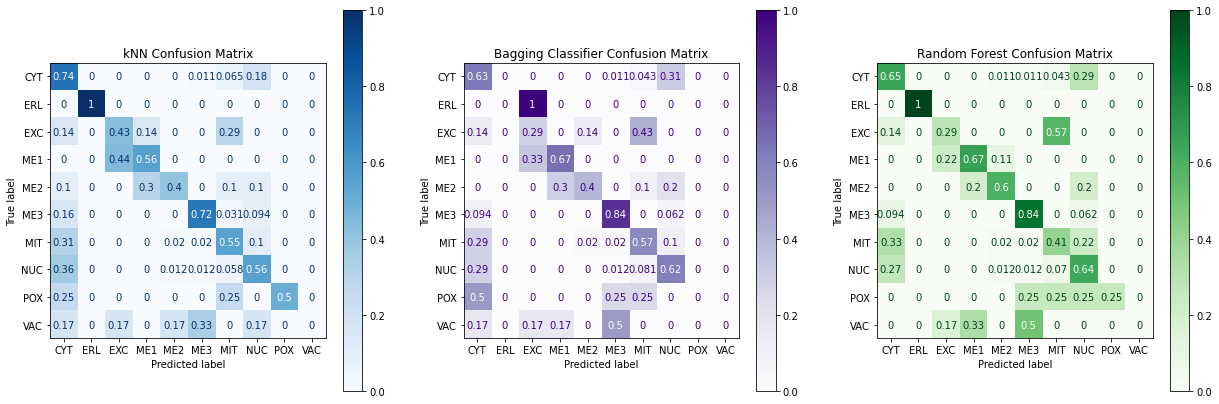

In [ ]:
#@title Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(21,7))
ax1.set_title('kNN Confusion Matrix')
ax2.set_title('Bagging Classifier Confusion Matrix')
ax3.set_title('Random Forest Confusion Matrix')
plot_confusion_matrix(knn, X_test, y_test,cmap=plt.cm.Blues,ax=ax1,normalize="true")
plot_confusion_matrix(bg, X_test, y_test,cmap=plt.cm.Purples,ax=ax2,normalize="true")
plot_confusion_matrix(rf, X_test, y_test,cmap=plt.cm.Greens,ax=ax3,normalize="true")
plt.show()

<div style='text-align: justify;'> 
&nbsp;&nbsp;&nbsp;The plot of the confusion matrix allowed us to understand where were the models making good predictions and where they were failing. As expected, all models fail more in the least represented classes. Though, it’s important to notice that the kNN outperforms the others in the class EXC, 43% of the predictions were correct, in the class ME1, 56%, in the class POX, 50% and in the class ERL, 100%, which means that the model was able to capture something that differentiates those less represented classes from the other ones.  One reason for this to happen is due to the fact that the kNN is an expressive model, and, as such, it might fit better to the training data. But, at the same time, it is more influenced by it, something that can be seen by the number of observations labelled as CYT when they belong to other localization site.
<br>
&nbsp;&nbsp;&nbsp; The Bagging Classifier and the Random Forest have a very similar performance overall. The Bagging Classifier seems to classify better in the CYT and MIT classes, but the Random Forest has a better accuracy in the ME1 and NUC localization sites – the rest of the classes haver pretty much the same results. When considering all classes, it seems like these models can make better predictions than the kNN, specially because they are more consistent in the classes with more representation. 
<br>
&nbsp;&nbsp;&nbsp;None of these models were built to predict with unbalanced data, though, as said before, the kNN outperforms the other two in the classes with fewer observations. This means, that if the goal is to locate well the sites of proteins that really are located in the less represented classes, then the kNN with 15 neighbours is the best model out of these three. If the goal is to get the better performance possible overall, then both the Bagging Classifier and the Random Forest seem to be a good option. One thing that we noticed before selecting the best model was that the Random Forest has a 100% accuracy on the training set, but doesn't seem to overfit. Considering, that theoretically a Random Forest model reduces the variance error in relation to the Bagging Classifier, and both probably have similar bias errors, then the Random Forest can be considered to be more consistent and a better solution for our problem.
</div>

# Conclusions

<div style='text-align: justify;'>
&nbsp;&nbsp;&nbsp;In the first section we saw that drawing a decision boundary was not an easy task. Different models draw different boundaries, depending on their expressiveness, on the assumptions they make (bias) and on their variance. So, while the K-NN can draw an extremely irregular boundary with little bias and high variance due to its expressiveness, models such as the Logistic Regression or QDA have well-defined boundaries because of their assumptions (high bias), but low variance.
<br>
&nbsp;&nbsp;&nbsp;In the second section we dealt with a dataset concerning sites of proteins, in which we obtained poor results on the classification of the observations. Various methods were used, but given the lack of knowledge regarding the domain of the problem and the fact that it was a multi-class classification task with extremely underrepresented classes, the accuracies of even the best models were far from good.
 </div>

# References
<div style='text-align: justify;'> 
1. The Elements of Statistical Learning. Hastie, Trevor, Tibshirani, Robert, Friedman, Jerome. Springer, 2nd Edition.
<br>
2. An Introduction to Statistical Learning - with applications in R G. James, D. Witten, T. Hastie, R. Tibshirani, Springer 2013.
<br>
3. https://medium.datadriveninvestor.com/understanding-adaboost-and-scikit-learns-algorithm-c8d8af5ace10
<br>
4. https://biomedres.us/pdfs/BJSTR.MS.ID.002066.pdf
</div>